In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random
import numpy.linalg
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# %matplotlib osx

In [23]:
S = np.linspace(0, 2*pi, 91)
T = np.linspace(0, pi, 91)

In [57]:
def draw(X, Y, Z):
    fig = plt.figure(figsize=(12,12), dpi=300)
    ax = fig.gca(projection='3d')
    ax.scatter(X, Y, Z, linewidth=0,antialiased=False)
    plt.show()

In [25]:
def svd(A):
    U, s, V = np.linalg.svd(A, full_matrices=True)
    return U, s, V

In [26]:
X = [cos(s) * sin(t) for s in S for t in T]
Y = [sin(s) * sin(t) for s in S for t in T] 
Z = [cos(t) for s in S for t in T]

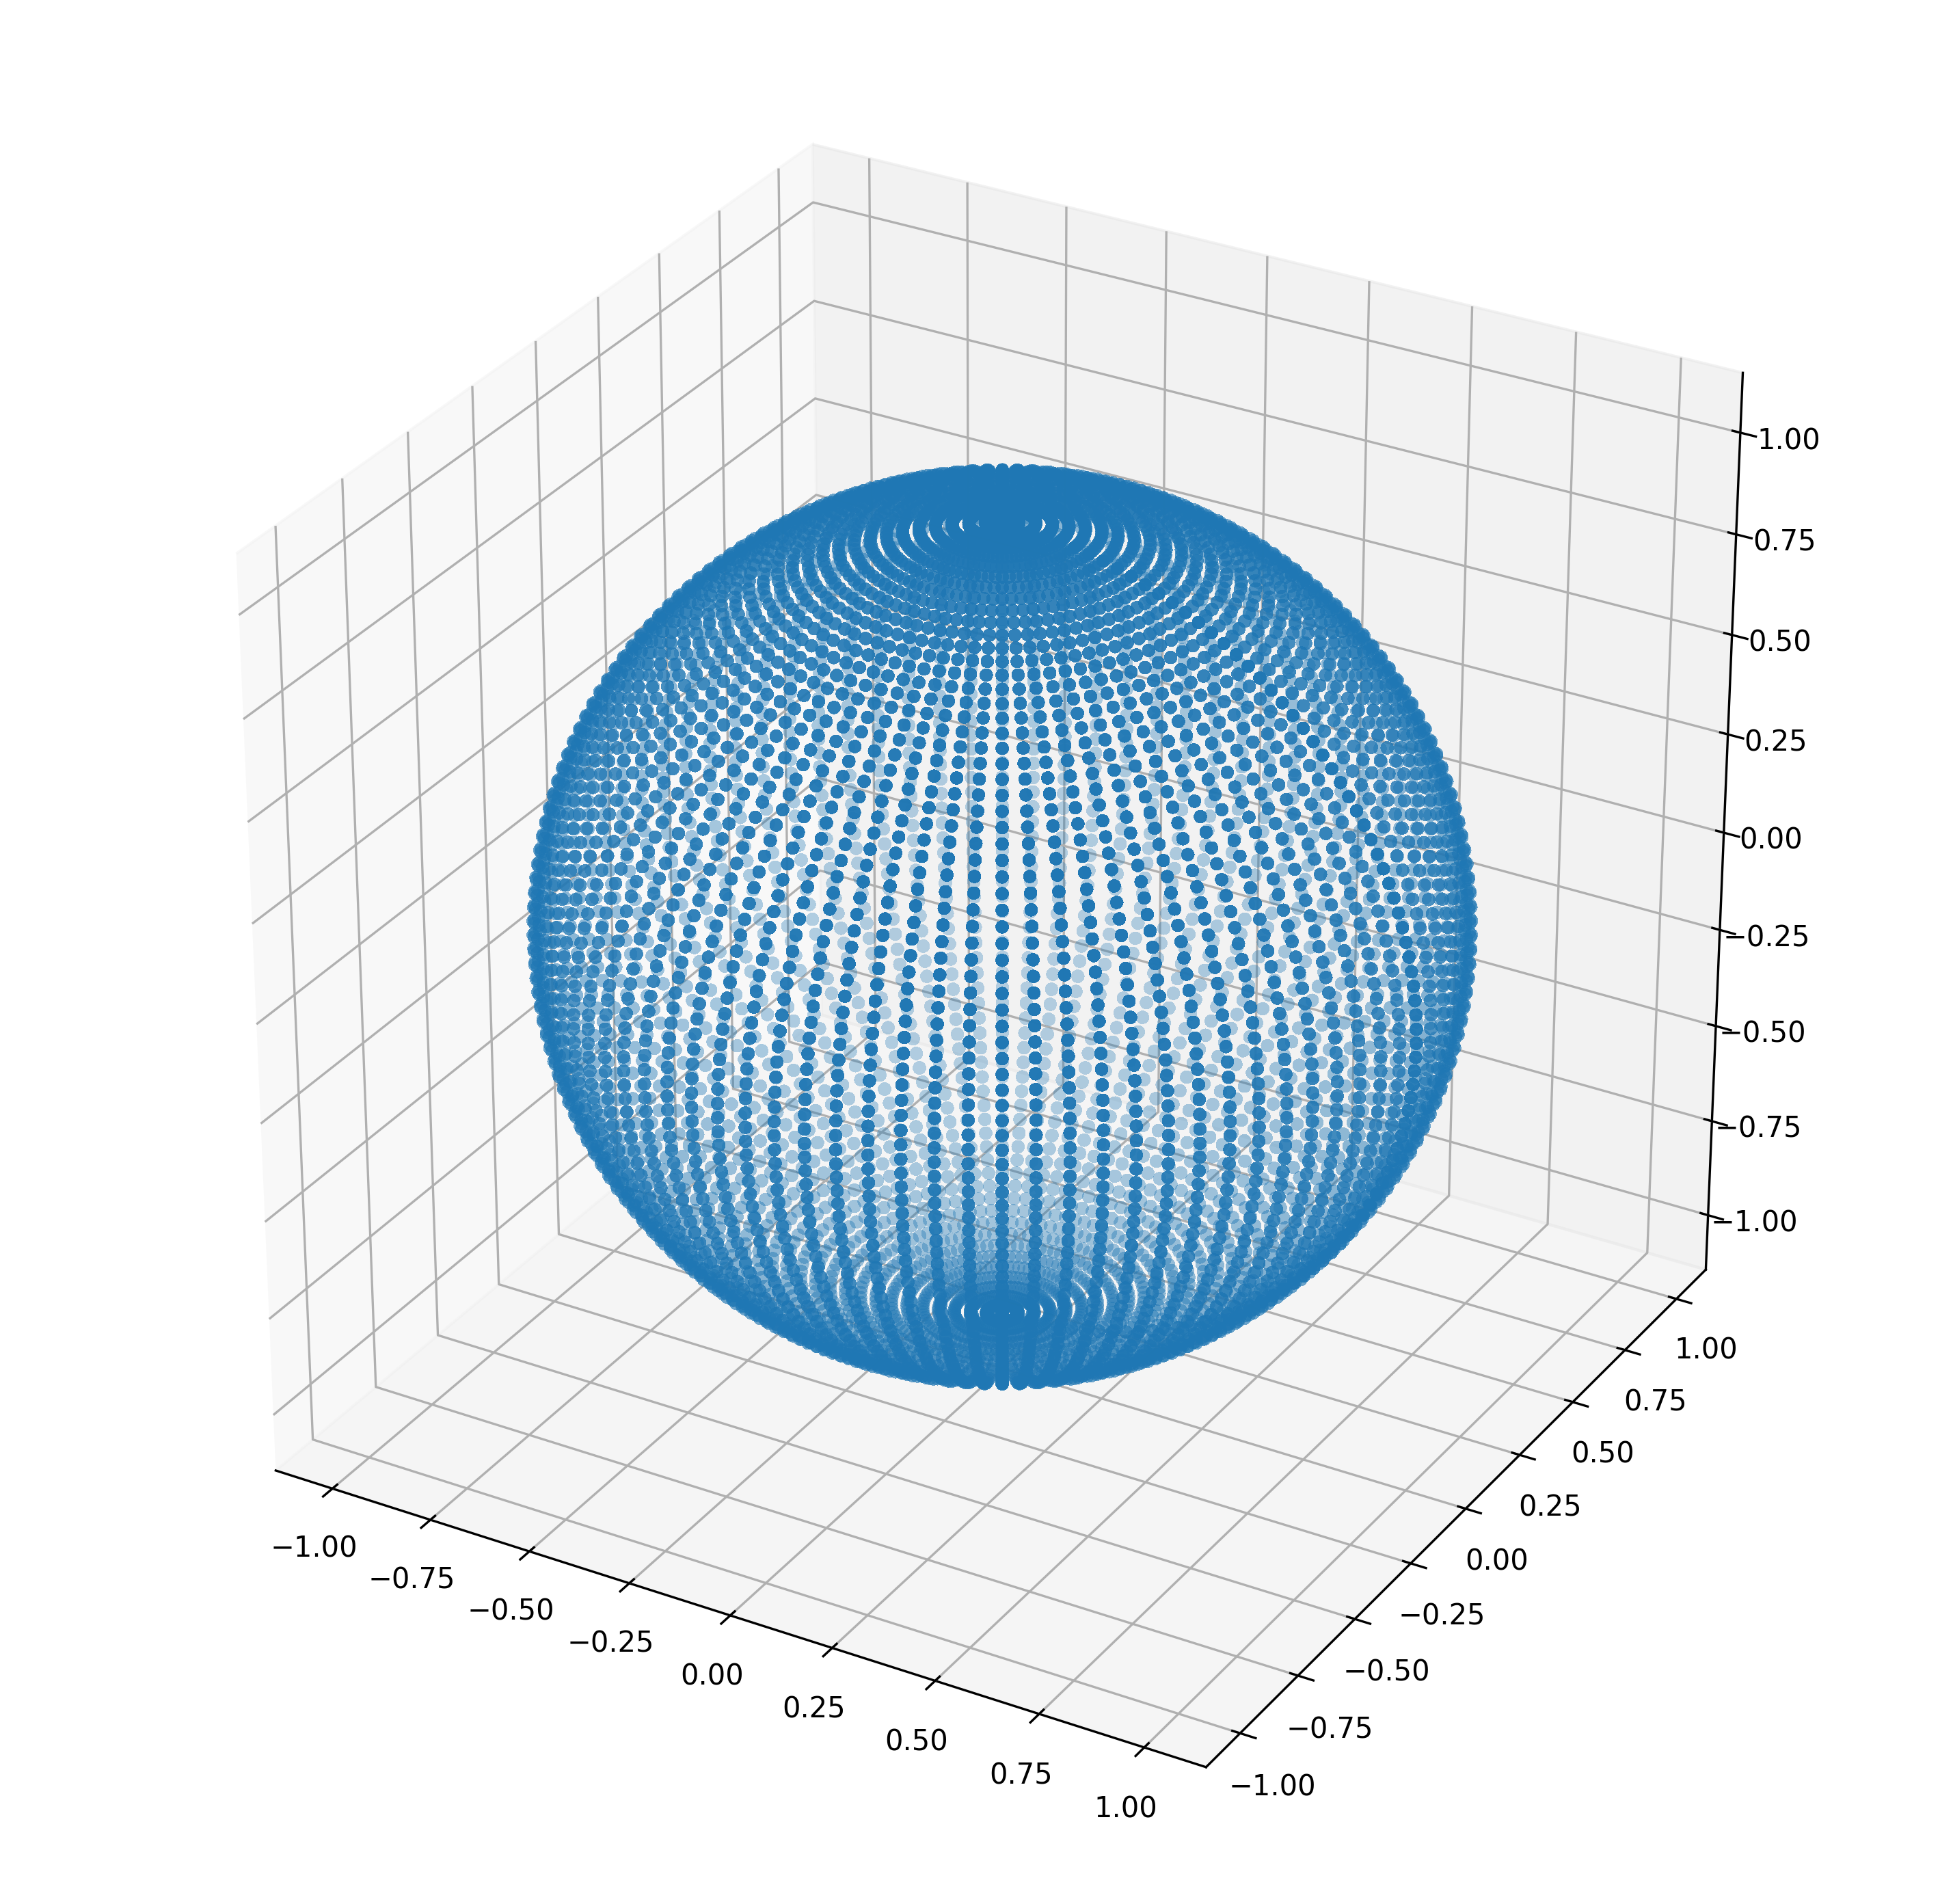

In [58]:
draw(X, Y, Z)

In [60]:
A1 = np.random.rand(3,3)
# A1[0][0] = 0
# A1[1][1] = 0
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

In [61]:
sA1 = A1 @ np.array([X,Y,Z])

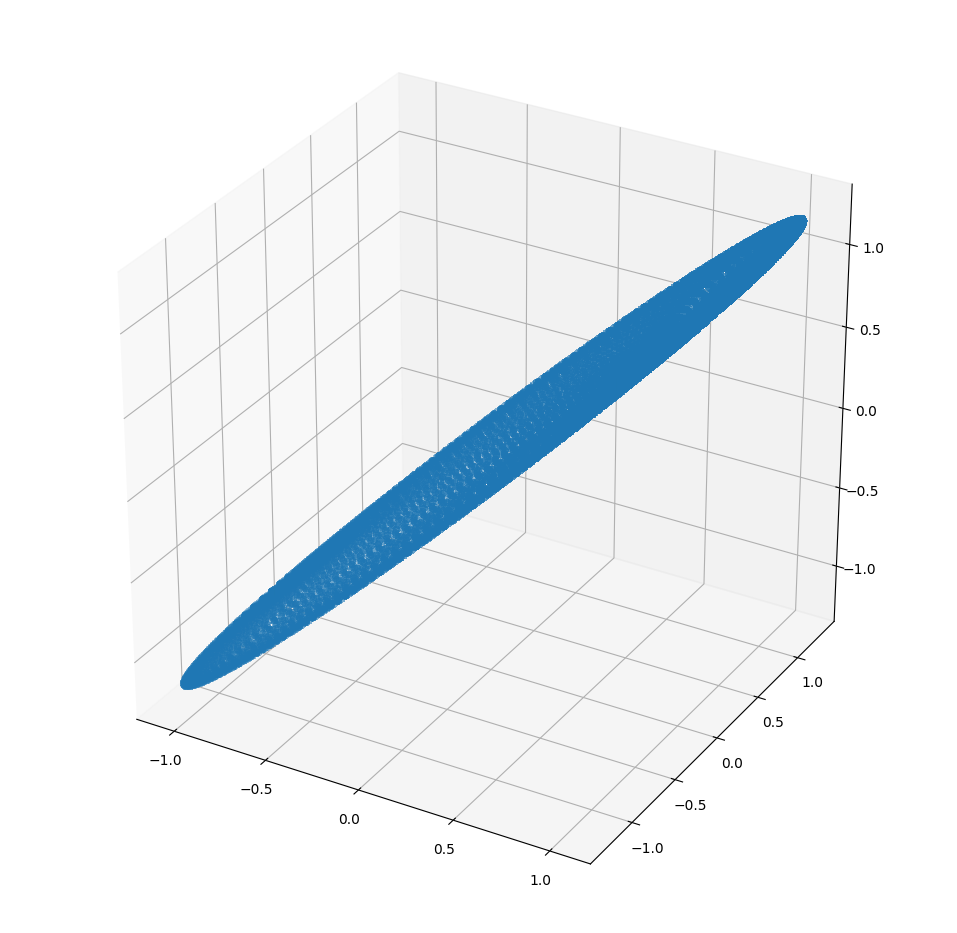

In [31]:
draw(*sA1)

In [52]:
sA2 = A2 @ np.array([X,Y,Z])

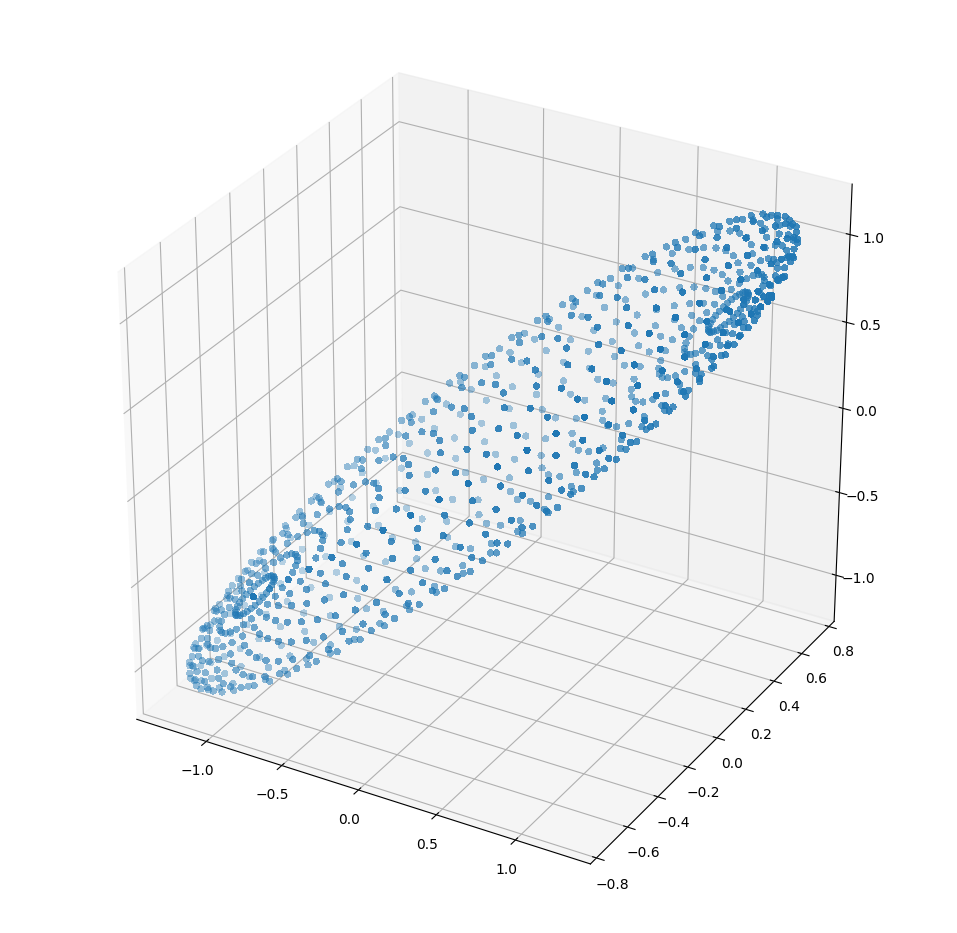

In [36]:
draw(X2, Y2, Z2)

In [53]:
sA3 = A3 @ np.array([X,Y,Z])

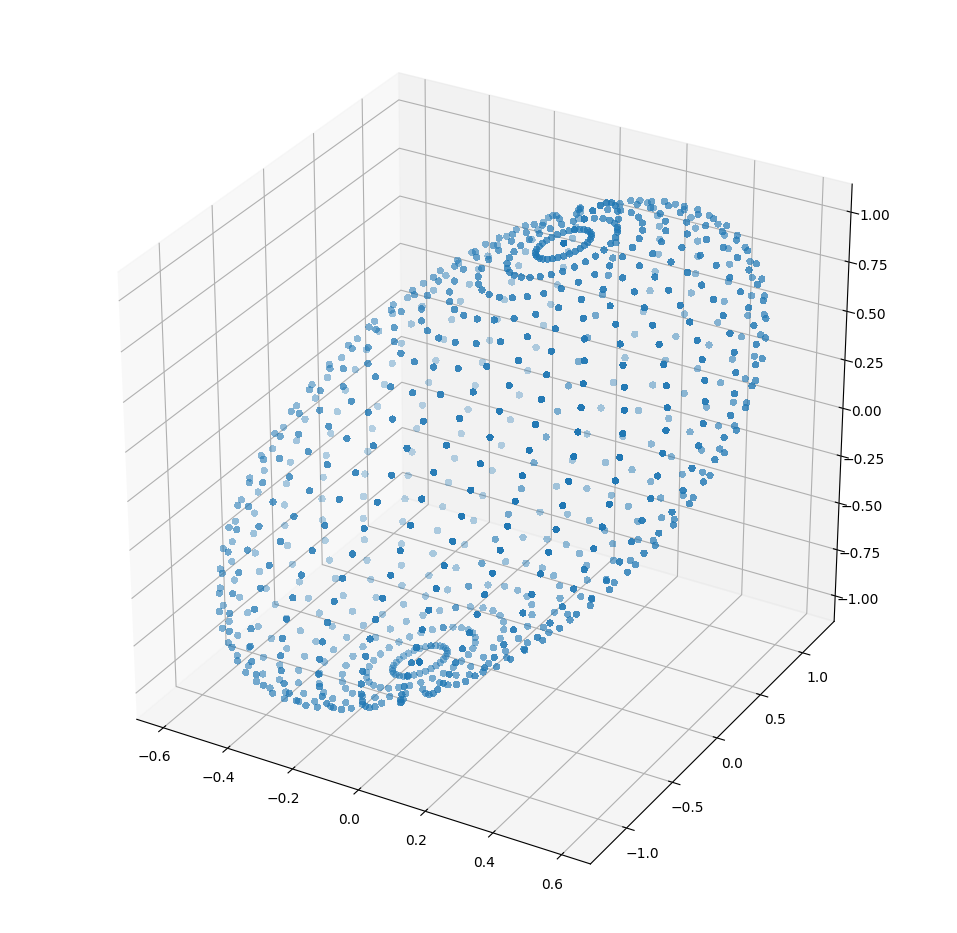

In [38]:
draw(X3, Y3, Z3)

# SVD

In [66]:
U1, E1, V1 = np.linalg.svd(A1)
U2, E2, V2 = np.linalg.svd(A2)
U3, E3, V3 = np.linalg.svd(A3)

In [67]:
def drawWithVec(sphere, U):
    fig = plt.figure(figsize=(11,11), dpi=100)
    ax = fig.gca(projection='3d')
    ax.scatter(*sphere, linewidth=0,antialiased=False)
    ax.quiver(0,0,0,
    #           [E1[0] * U1[0][0], E1[1] * U1[1][0], E1[2] * U1[2][0]],
    #           [E1[0] * U1[0][1], E1[1] * U1[1][1], E1[2] * U1[2][1]],
    #           [E1[0] * U1[0][2], E1[1] * U1[1][2], E1[2] * U1[2][2]],
    #           [U1[0][0], U1[1][0], U1[2][0]],
    #           [U1[0][1], U1[1][1], U1[2][1]],
    #           [U1[0][2], U1[1][2], U1[2][2]],
              *U,
              color="red")
    plt.show()

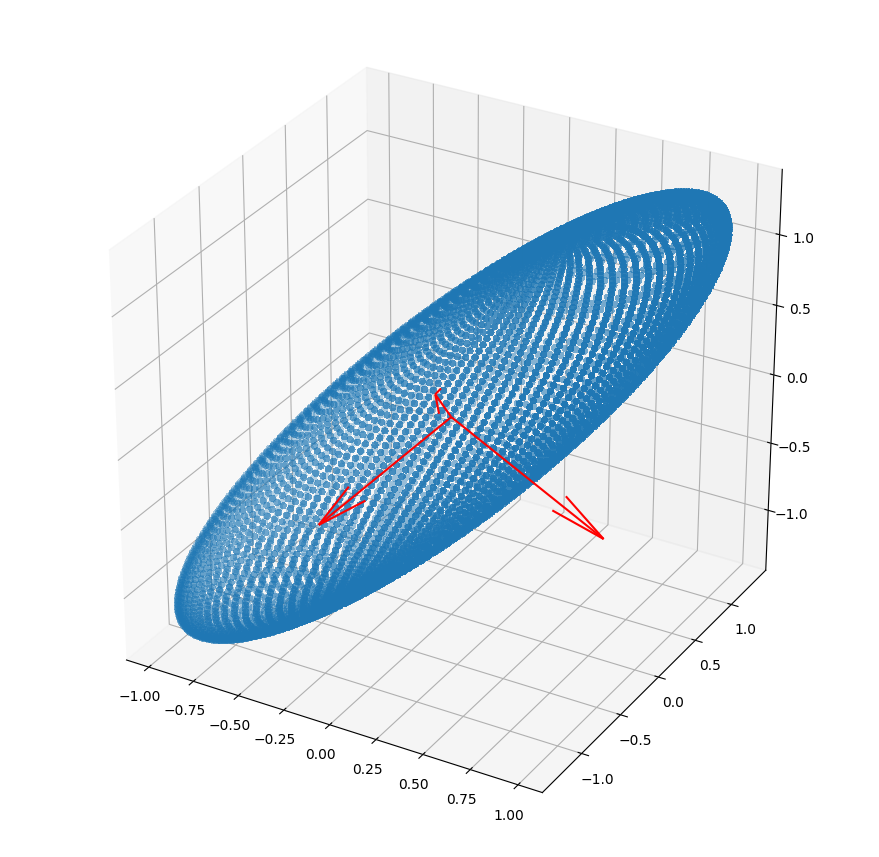

In [68]:
drawWithVec(sA1, U1)

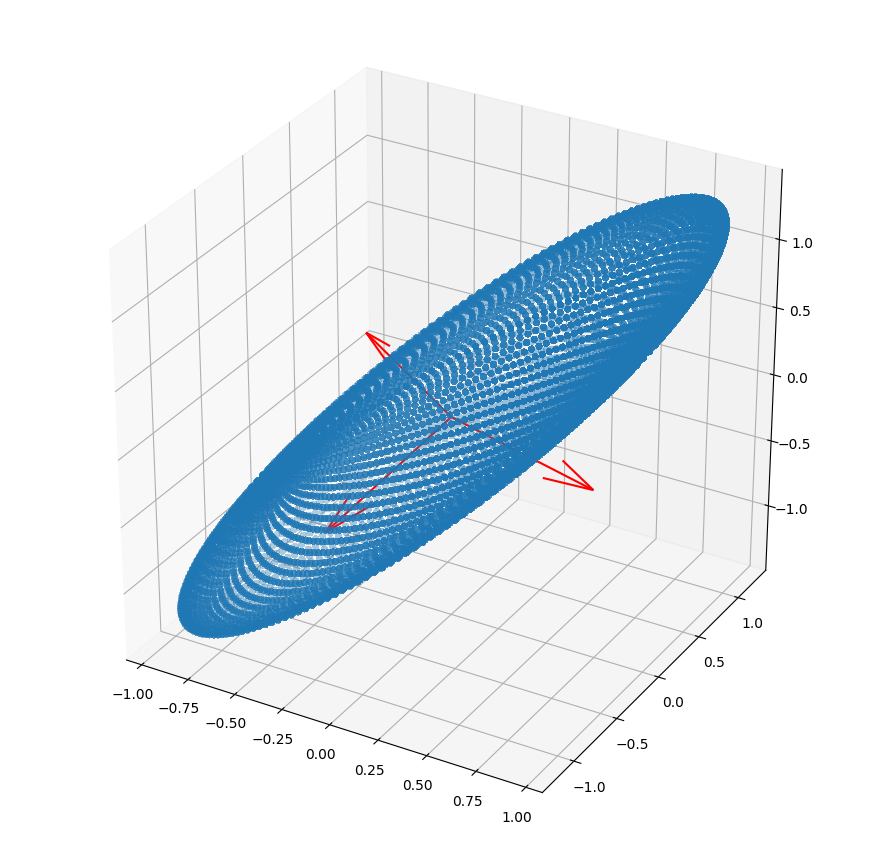

In [69]:
drawWithVec(sA2, U2)

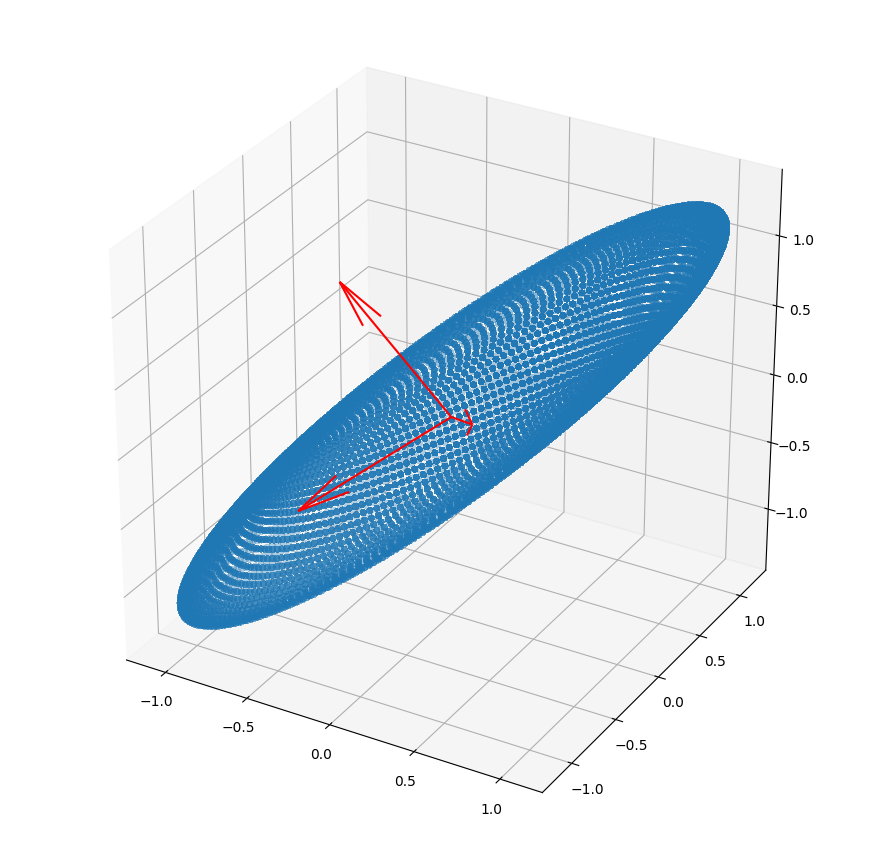

In [70]:
drawWithVec(sA3, U3)

# Low Rank

In [31]:
%matplotlib inline
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt


def reduce(r, U, s, V):
    s = s[:r]  # r first singular values
    U = U[:, :r]
    V = V[:r, :]
    return U, s, V


def compose(U, s, V):
    D = np.diag(s)
    return U @ D @ V


def compress(image, k):
    U, s, V = np.linalg.svd(image)
    Ur, sr, Vr = reduce(k, U, s, V)
    result = compose(Ur, sr, Vr)
    return result


def processImage(image, ranks = [8, 32, 64, 128, 256, 512]):
    compressed = {k: compress(image, k) for k in ranks}
    diff = {k: np.abs(image - compressed[k]) for k in ranks}
    return compressed, diff

def plot(img):
    plt.imshow(img)
    plt.show()

In [9]:
compressed, diff = processImage(scipy.misc.face(gray=True))

8:



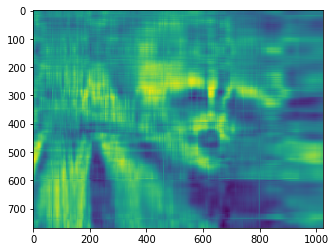

32:



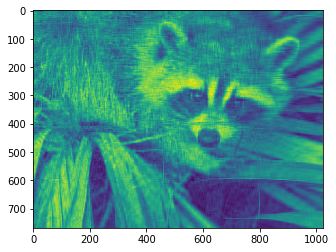

64:



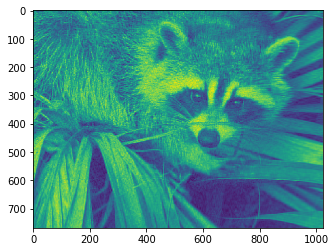

128:



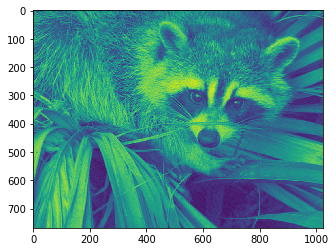

256:



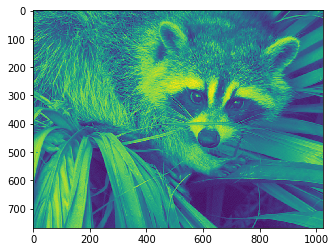

512:



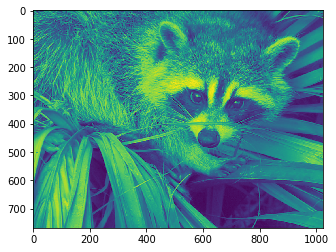

In [29]:
for x in compressed:
    print(str(x) + ":\n")
    plot(compressed[x])

8:



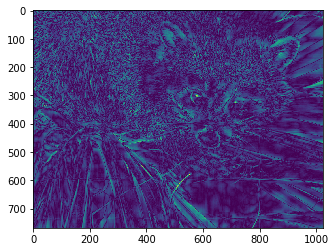

32:



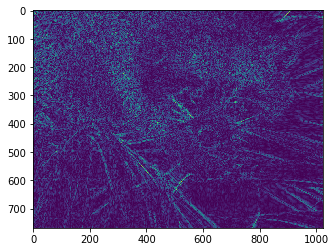

64:



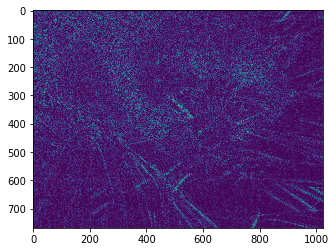

128:



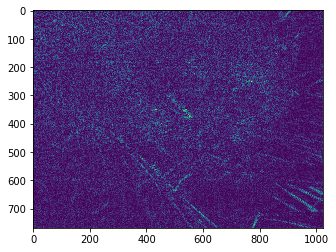

256:



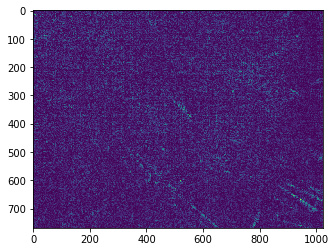

512:



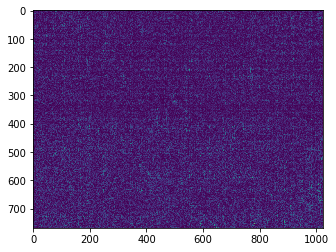

In [30]:
for x in diff:
    print(str(x) + ":\n")
    plot(diff[x])